### 逻辑回归

In [260]:
import numpy as np
import matplotlib.pyplot as plt

import array

In [18]:
"""
读取文件
"""
fw = open("E:/MLiA_SourceCode/machinelearninginaction/Ch05/testSet.txt")
arr_data = []
arr_labels = []
for line in fw.readlines():
    con = line.strip().split("\t")
    arr_data.append([float(1),float(con[0]),float(con[1])])
    arr_labels.append([float(con[2])])

#特征值（矩阵）
matrix_data = np.mat(arr_data)
#标签值（矩阵）
matrix_labels = np.mat(arr_labels)

In [19]:
"""
sigmoid函数的定义
"""
def sigmoid(inX):
    return 1.0/(1 + np.exp(-inX))

In [435]:
"""
通过批量梯度下降的方法进行回归
"""
def batch_gradient(matrix_data,matrix_labels):
    #得到特征值的样本数和特征值个数
    m,n = matrix_data.shape
    #定义一个学习率
    alpha = 0.0001
    #最大的循环次数
    maxCycle = 50
    costs = []
    weights = np.ones((n,1))
    for i in range(maxCycle):
        h = sigmoid(matrix_data * weights)
        cost = (h - matrix_labels)
        costs.append(cost[0,0])
        weights = weights - alpha * matrix_data.transpose() * cost     
    return weights,costs

In [475]:
"""
通过随机梯度下降的方法进行回归
"""
def sgd(matrix_data,matrix_labels):
    #得到特征值的样本数和特征值个数
    m,n = matrix_data.shape
    arr_data = matrix_data.tolist()
    #定义一个学习率
    alpha = 0.01
    weights = np.ones(n)
    costs = []
    for i in range(m):
        h = sigmoid(sum(arr_data[i] * weights))
        cost = (h - matrix_labels.tolist()[i] )
        
        a = [alpha * arr_data[i][0] * cost,alpha * arr_data[i][1] * cost,alpha * arr_data[i][2] * cost]
        costs.append(a[0])
        weights = weights - a    
    return weights,costs

In [ ]:
"""
小批量随机下降
"""
def minibatch_gradient():
    

In [447]:
weights,costs = batch_gradient(matrix_data,matrix_labels)

In [476]:
weights,costs = sgd(matrix_data,matrix_labels)

In [318]:
"""
画出决策边界
"""
def plotBestFit(arr_data,arr_labels,weights):
    x_cord1 = []
    y_cord1 = []
    x_cord2 = []
    y_cord2 = []
    for i in range(len(arr_data)):
        if int(arr_labels[i][0]) == 1:
            x_cord1.append(arr_data[i][1])
            y_cord1.append(arr_data[i][2])
        if int(arr_labels[i][0]) == 0:
            x_cord2.append(arr_data[i][1])
            y_cord2.append(arr_data[i][2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x_cord1,y_cord1,c = "r")
    ax.scatter(x_cord2,y_cord2,c = "g")
    x = list(np.arange(-3.0,3.0,0.1))
    y = []
    for i in x:
        a = weights[0,0]
        b = weights[1,0]
        c = weights[2,0]
        d = (-a - b* i)/c
        y.append(d) 
    ax.plot(x,y)
    plt.show()

    


In [445]:
"""
画出损失函数
"""
def plotCost(costs):
    fig = plt.figure()
    _x = list(np.arange(1,51))
    plt.plot(_x,costs)
    plt.show()

In [477]:
"""
画出损失函数
"""
def plotCost2(costs):
    fig = plt.figure()
    _x = list(np.arange(1,101))
    print(costs)
    plt.plot(_x,costs)
    plt.show()

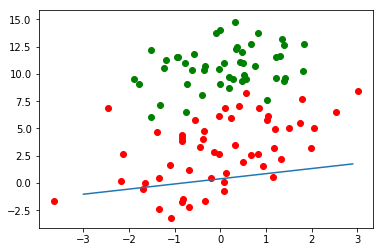

In [465]:
"""
批量梯度下降 决策边界图形
"""
plotBestFit(arr_data,arr_labels,weights)

[array([0.01]), array([-5.46996434e-04, -9.81604135e-03, -1.69709806e-08]), array([0.00945421, 0.00102029, 0.01      ]), array([0.00942014, 0.00021573, 0.01      ]), array([0.00938398, 0.00772171, 0.01      ]), array([-6.87288692e-04, -2.43535175e-03, -1.13371593e-10]), array([0.00931643, 0.0086688 , 0.01      ]), array([-7.74173366e-04, -9.98640634e-03, -5.12453167e-10]), array([0.00922881, 0.00826094, 0.01      ]), array([0.00915254, 0.00482399, 0.01      ]), array([-9.31982134e-04, -9.95414207e-04, -2.13615112e-09]), array([0.0090749 , 0.00970702, 0.01      ]), array([-1.05033899e-03, -5.31261811e-04, -1.44626476e-05]), array([0.00895493, 0.00012536, 0.01      ]), array([-1.11684838e-03, -8.00257516e-03, -1.13149560e-07]), array([-0.00111002, -0.00088819, -0.00041132]), array([-1.10616530e-03, -5.15136256e-03, -5.04899526e-08]), array([-1.09843244e-03, -5.23120448e-03, -4.79665739e-05]), array([-0.00109451, -0.00623348, -0.00293041]), array([-1.09318366e-03, -6.89574719e-04, -1.0859

ValueError: setting an array element with a sequence.

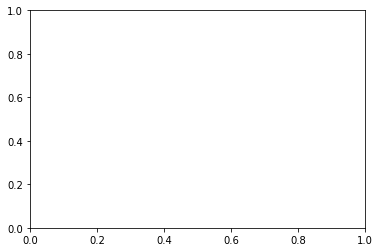

In [478]:
"""
批量梯度下降 损失函数图形
"""
plotCost2(costs)

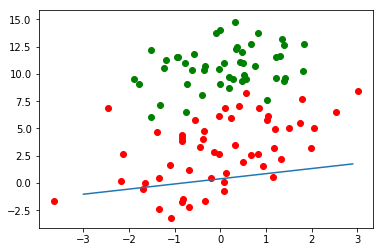

In [319]:
"""
随机梯度下降 决策边界图形
"""
plotBestFit(arr_data,arr_labels,weights)